In [1]:
import pandas as pd

from datetime import datetime

import pickle 

data = pickle.load(open("/Users/loicalix-brown/OneDrive/FYP/Coding/fyp_final_data.p", "rb"))
print(data)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [2]:
# data = pd.read_pickle("/Users/loicalix-brown/OneDrive/FYP/Coding/fyp_final_data.p")
data = pd.DataFrame.from_dict(data)

In [3]:
data

,occurred_at,event_type,email
0,2020-01-09 14:46:22+00:00,card_added,001johnpaulbrown@gmail.com
1,2020-01-09 14:46:22+00:00,customer_created,001johnpaulbrown@gmail.com
2,2020-01-09 14:46:22+00:00,payment_source_added,001johnpaulbrown@gmail.com
3,2020-01-09 14:46:22+00:00,subscription_created,001johnpaulbrown@gmail.com
4,2020-01-10 14:46:23+00:00,subscription_trial_end_reminder,001johnpaulbrown@gmail.com
...,...,...,...
2895641,2020-04-26 17:47:14.102000+00:00,Visited Website,dealsforwho@gmail.com
2895642,2020-01-14 08:16:27.118000+00:00,Payment Succeeded,zpg0915@gmail.com
2895643,2020-02-14 08:16:21.484000+00:00,Payment Succeeded,zpg0915@gmail.com
2895644,2020-03-14 08:16:27.197000+00:00,Payment Succeeded,zpg0915@gmail.com


In [4]:
import numpy as np
df = data

for i in range (0,len(data)):
    df.occurred_at[i] = pd.to_datetime(data.occurred_at[i]).date()
    
    if i % 100000 == 0:
        print(i)

/Users/loicalix-brown/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2300000
2400000
2500000
2600000
2700000
2800000


In [5]:
data_raw = []

for index, row in df.iterrows():
    data_raw.append({
        "id": row['email'],
        "occurred_at": row["occurred_at"],
        "type": row["event_type"]
    })
    
    if index % 100000 == 0:
        print(index)
        
print(data_raw[0])

0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2300000
2400000
2500000
2600000
2700000
2800000
{'id': '001johnpaulbrown@gmail.com', 'occurred_at': datetime.date(2020, 1, 9), 'type': 'card_added'}


In [6]:
import datetime

def record_user_event(user_event_records, event):
    event_time = event['occurred_at']
    
    if event_time in user_event_records:
        user_event_records[event_time] += 1
    else:
        user_event_records[event_time] = 1
        
    return user_event_records

def create_user_to_events_map(data_raw):
    user_to_events = {}
    
    for event in data_raw:
        cur_user_id = event["id"]
        event_type = event["type"];

        if cur_user_id in user_to_events:
            user_data = user_to_events[cur_user_id]

            if event_type in user_data:
                user_to_events[cur_user_id][event_type] = record_user_event(user_data[event_type], event)
            else:
                user_to_events[cur_user_id][event_type] = {}
                user_to_events[cur_user_id][event_type][event['occurred_at']] = 1

            user_to_events[cur_user_id] = user_data
        else:
            user_to_events[cur_user_id] = {}
            user_to_events[cur_user_id][event_type] = {}
            user_to_events[cur_user_id][event_type][event['occurred_at']] = 1

    return user_to_events

def pad_empty_dates_with_zero(user_to_events, date_from, date_to):
    result = user_to_events
    
    daterange = pd.date_range(date_from, date_to)

    for cur_date in daterange:
        cur_date_formatted = datetime.date(cur_date.year, cur_date.month, cur_date.day)
        
        for (email, user_events) in user_to_events.items():
            for (event_type, dates_map) in user_events.items():
                if cur_date_formatted not in dates_map:
                    dates_map[cur_date_formatted] = 0         
    return result
        
user_to_events = create_user_to_events_map(data_raw)
user_to_events = pad_empty_dates_with_zero(user_to_events, datetime.date(2020, 1, 1), datetime.date(2020, 5, 1))

# user_to_events

In [7]:

def generate_event_usage_patterns(event_type, users_event_data):
    result = []
    for (user_id, user_events) in users_event_data.items():
        
        pattern = []
    
        has_performed_event = event_type in user_events
        
        if has_performed_event:
            
            event_with_timestamps = list(user_events[event_type].items())

            event_with_timestamps.sort(key=lambda item: item[0])

            for (date, num_events) in event_with_timestamps:
                pattern.append(num_events)
                

        result.append({
            "user_id": user_id,
            event_type: pattern

        })

    return result
    
sh_usage_pattern = generate_event_usage_patterns("subscription_cancelled", user_to_events)

In [8]:
sh_usage_pattern_cancelled = generate_event_usage_patterns("subscription_cancelled", user_to_events)
sh_usage_pattern_searched = generate_event_usage_patterns("Searched Hashtag", user_to_events)
sh_usage_pattern_exported = generate_event_usage_patterns("Exported Hashtags", user_to_events)
sh_usage_pattern_subscription_activated = generate_event_usage_patterns("subscription_activated", user_to_events)
sh_usage_pattern_visited_app = generate_event_usage_patterns("Visited App", user_to_events)
sh_usage_pattern_payment_failed = generate_event_usage_patterns("payment_failed", user_to_events)
sh_usage_pattern_payment_succeeded = generate_event_usage_patterns("payment_succeeded", user_to_events)
sh_usage_pattern_created_collection = generate_event_usage_patterns("Created Collection", user_to_events)
sh_usage_pattern_scheduled_cancellation = generate_event_usage_patterns("subscription_cancellation_scheduled", user_to_events)
sh_usage_pattern_visited_blog = generate_event_usage_patterns("Visited Blog", user_to_events)
sh_usage_pattern_adv_searched = generate_event_usage_patterns("Adv Searched", user_to_events)
sh_usage_pattern_reporting = generate_event_usage_patterns("Toggled Reporting", user_to_events)
sh_usage_pattern_linked_account = generate_event_usage_patterns("Linked IG Account", user_to_events)
sh_usage_pattern_triggered_error = generate_event_usage_patterns("Triggered Error", user_to_events)

In [9]:
test = 0
print(sh_usage_pattern_exported[0:1])


[{'user_id': '001johnpaulbrown@gmail.com', 'Exported Hashtags': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}]


In [10]:
def findIndex(pattern):
    myArray = np.array(pattern)
    return np.argmax(myArray > 0)

In [11]:
df_cancel = pd.DataFrame(sh_usage_pattern_cancelled)
# df_search = pd.DataFrame(sh_usage_pattern_searched)
# df_export = pd.DataFrame(sh_usage_pattern_exported)
df_start = pd.DataFrame(sh_usage_pattern_subscription_activated)
# df = pd.merge(df_cancel, df_search, on='user_id', how='outer')
# df = pd.merge(df, df_export, on='user_id', how='outer')
# df = pd.merge(df, df_start, on="user_id", how='outer')
# df.columns = [c.replace(' ', '_') for c in df.columns]


In [12]:
sh_usage_pattern_cancelled

[{'user_id': '001johnpaulbrown@gmail.com',
  'subscription_cancelled': [0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   1,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0]},
 {'user_id': '007dearrcat@gmail.com',
  'subscription_cancelled': [0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
 

In [13]:
df_search = pd.DataFrame(sh_usage_pattern_searched)

In [14]:
df_export = pd.DataFrame(sh_usage_pattern_exported)

In [15]:
print(df_export)

                          user_id  \
0      001johnpaulbrown@gmail.com   
1           007dearrcat@gmail.com   
2          0208msanchez@gmail.com   
3              0305pure@gmail.com   
4            071190.sdj@gmail.com   
...                           ...   
27487    rida.bendris94@gmail.com   
27488      kam.r.laribi@gmail.com   
27489        jareer.k13@gmail.com   
27490    pamela.mejia93@gmail.com   
27491       dealsforwho@gmail.com   

                                       Exported Hashtags  
0      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, ...  
1                                                     []  
2      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
3                                                     []  
4      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
...                                                  ...  
27487                                                 []  
27488                                                 []  
27489                   

In [16]:
df_start = pd.DataFrame(sh_usage_pattern_subscription_activated)


In [17]:
df = pd.DataFrame()

In [18]:
df_cancel = pd.DataFrame(sh_usage_pattern_cancelled)
df_search = pd.DataFrame(sh_usage_pattern_searched)
df_export = pd.DataFrame(sh_usage_pattern_exported)
df_start = pd.DataFrame(sh_usage_pattern_subscription_activated)
df_visited_app = pd.DataFrame(sh_usage_pattern_visited_app)
df_payment_failed = pd.DataFrame(sh_usage_pattern_payment_failed)
df_created_collection = pd.DataFrame(sh_usage_pattern_created_collection)
df_payment_succeeded = pd.DataFrame(sh_usage_pattern_payment_succeeded)
df_scheduled_cancellation = pd.DataFrame(sh_usage_pattern_scheduled_cancellation)
df_visited_blog = pd.DataFrame(sh_usage_pattern_visited_blog)
df_adv_searched = pd.DataFrame(sh_usage_pattern_adv_searched)
df_reporting = pd.DataFrame(sh_usage_pattern_reporting)
df_linked_account = pd.DataFrame(sh_usage_pattern_linked_account)
df_triggered_error = pd.DataFrame(sh_usage_pattern_triggered_error)

In [19]:
df_cancel

,user_id,subscription_cancelled
0,001johnpaulbrown@gmail.com,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,007dearrcat@gmail.com,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,0208msanchez@gmail.com,[]
3,0305pure@gmail.com,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,071190.sdj@gmail.com,[]
...,...,...
27487,rida.bendris94@gmail.com,[]
27488,kam.r.laribi@gmail.com,[]
27489,jareer.k13@gmail.com,[]
27490,pamela.mejia93@gmail.com,[]


In [20]:
# user_events = []

# df_cancel_new = df_cancel.set_index(['user_id'])
# df_search_new = df_search.set_index(['user_id'])
# df_start_new = df_start.set_index(['user_id'])
# df_exported_new = df_export.set_index(['user_id'])

# for index, row in df_cancel.iterrows():
#     user_id = row["user_id"]
    
#     try:
#         user_event = {
#             "user_id": user_id,
#             "subscription_cancelled": row["subscription_cancelled"],
#             "searched_hashtag": df_search_new.loc[user_id]["Searched Hashtag"],
#             "subscription_activated": df_start_new.loc[user_id]["subscription_activated"],
#             "exported_hashtags": df_exported_new.loc[user_id]["Exported Hashtags"],
#             "visited_app": df_visited_app_new.loc[user_id]["Visited App"],
# #             "payment_failed": df_payment_failed_new.loc[user_id]["payment_failed"],
#             "created_collection": df_created_collection_new.loc[user_id]["Created Collection"],
# #             "subscription_cancellation_scheduled": df_scheduled_cancellation_new.loc[user_id]["subscription_cancellation_scheduled"],
# #             "visited_blog": df_visited_blog_new.loc[user_id]["Visited Blog"],
# #             "adv_searched": df_adv_searched_new.loc[user_id]["Adv Searched"],
# #             "toggled_reporting": df_reporting_new.loc[user_id]["Toggled Reporting"],
# #             "linked_IG_account": df_linked_account_new.loc[user_id]["Linked IG Account"],
# #             "payment_succeeded": df.payment_succeeded_new.loc[user_id]["payment_succeeded"]

#         }
#     except:
#         pass
    
#     if index % 1000 == 0:
#         print(index)
        
#     user_events.append(user_event)

In [21]:
user_events = []

df_cancel_new = df_cancel.set_index(['user_id'])
df_search_new = df_search.set_index(['user_id'])
df_start_new = df_start.set_index(['user_id'])
df_exported_new = df_export.set_index(['user_id'])
df_visited_app_new = df_visited_app.set_index(['user_id'])
df_payment_failed_new = df_payment_failed.set_index(['user_id'])
df_created_collection_new = df_created_collection.set_index(['user_id'])
df_scheduled_cancellation_new = df_scheduled_cancellation.set_index(['user_id'])
df_visited_blog_new = df_visited_blog.set_index(['user_id'])
df_adv_searched_new = df_adv_searched.set_index(['user_id'])
df_reporting_new = df_reporting.set_index(['user_id'])
df_linked_account_new = df_linked_account.set_index(['user_id'])
df_payment_succeeded_new = df_payment_succeeded.set_index(['user_id'])

for index, row in df_cancel.iterrows():
    user_id = row["user_id"]
    
    try:
        user_event = {
            "user_id": user_id,
            "subscription_cancelled": row["subscription_cancelled"],
            "searched_hashtag": df_search_new.loc[user_id]["Searched Hashtag"],
            "subscription_activated": df_start_new.loc[user_id]["subscription_activated"],
            "exported_hashtags": df_exported_new.loc[user_id]["Exported Hashtags"],
            "visited_app": df_visited_app_new.loc[user_id]["Visited App"],
            "payment_failed": df_payment_failed_new.loc[user_id]["payment_failed"],
            "created_collection": df_created_collection_new.loc[user_id]["Created Collection"],
            "subscription_cancellation_scheduled": df_scheduled_cancellation_new.loc[user_id]["subscription_cancellation_scheduled"],
            "visited_blog": df_visited_blog_new.loc[user_id]["Visited Blog"],
            "adv_searched": df_adv_searched_new.loc[user_id]["Adv Searched"],
            "toggled_reporting": df_reporting_new.loc[user_id]["Toggled Reporting"],
            "linked_IG_account": df_linked_account_new.loc[user_id]["Linked IG Account"],
#             "payment_succeeded": df.payment_succeeded_new.loc[user_id]["payment_succeeded"]
         }
    except:
        pass
    
    if index % 1000 == 0:
        print(index)
        
    user_events.append(user_event)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000


In [22]:
df = pd.DataFrame.from_dict(user_events)

In [23]:
df

,user_id,subscription_cancelled,searched_hashtag,subscription_activated,exported_hashtags,visited_app,payment_failed,created_collection,subscription_cancellation_scheduled,visited_blog,adv_searched,toggled_reporting,linked_IG_account
0,001johnpaulbrown@gmail.com,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 15, 0, 13, 0, 0, 3, 0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 19, 0, 10, 0, 0, 7, 0...",[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 13, 0, 0, 3, 0,...",[],[]
1,007dearrcat@gmail.com,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",[],[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, ...",[],[],[],[],[],[]
2,0208msanchez@gmail.com,[],"[0, 11, 0, 0, 0, 0, 0, 0, 14, 8, 3, 7, 0, 0, 0...",[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 7, 0, 0, 0, 0, 0, 0, 4, 4, 2, 2, 0, 0, 0, ...",[],[],[],[],[],[],[]
3,0305pure@gmail.com,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[],[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[],[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[],[],[],[]
4,071190.sdj@gmail.com,[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27487,rida.bendris94@gmail.com,[],[],[],[],[],[],[],[],[],[],[],[]
27488,kam.r.laribi@gmail.com,[],[],[],[],[],[],[],[],[],[],[],[]
27489,jareer.k13@gmail.com,[],[],[],[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[],[],[],[],[],[],[]
27490,pamela.mejia93@gmail.com,[],[],[],[],[],[],[],[],[],[],[],[]


In [24]:
start_indices = []
for i in range(len(df)):
    if (len(df.subscription_activated[i]) > 0):
        start_index = findIndex(df.subscription_activated[i])
  
        start_indices.append(start_index)
    else:
        start_index = 0
        start_indices.append(start_index)

In [25]:
print(start_indices)

[15, 9, 0, 0, 93, 90, 0, 0, 37, 103, 0, 0, 86, 89, 0, 49, 74, 0, 0, 88, 96, 0, 32, 0, 116, 0, 0, 110, 0, 1, 0, 40, 94, 0, 96, 0, 0, 0, 63, 59, 98, 0, 20, 70, 61, 0, 0, 23, 0, 99, 19, 0, 85, 0, 0, 93, 0, 0, 49, 0, 88, 0, 0, 0, 74, 89, 35, 0, 0, 70, 80, 0, 0, 48, 0, 0, 68, 94, 93, 0, 0, 100, 0, 0, 0, 0, 75, 111, 119, 0, 0, 0, 38, 14, 0, 0, 54, 0, 0, 0, 30, 75, 0, 114, 48, 0, 0, 0, 0, 0, 0, 0, 0, 39, 0, 0, 0, 64, 104, 0, 0, 0, 0, 71, 0, 0, 104, 50, 0, 37, 0, 0, 0, 57, 0, 23, 96, 0, 0, 0, 23, 79, 78, 24, 0, 0, 0, 0, 108, 80, 0, 55, 89, 49, 0, 0, 41, 0, 103, 91, 63, 0, 34, 0, 116, 73, 0, 0, 0, 12, 0, 65, 0, 107, 0, 0, 0, 105, 63, 93, 44, 0, 0, 0, 0, 0, 59, 0, 107, 0, 0, 0, 84, 0, 0, 0, 98, 0, 0, 0, 0, 0, 0, 0, 57, 69, 0, 106, 108, 54, 76, 30, 29, 0, 105, 114, 0, 0, 0, 92, 0, 0, 0, 16, 47, 82, 0, 101, 0, 0, 104, 0, 0, 0, 0, 0, 0, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 29, 0, 0, 0, 0, 0, 0, 11, 45, 0, 0, 0, 65, 0, 0, 57, 88, 0, 33, 0, 0, 52, 0, 0, 79, 40, 0, 47, 0, 58, 79, 70, 0, 101, 0, 40, 44, 63, 

In [26]:
count = 0 
for i in range(len(start_indices)):
    if start_indices[i] > 6:
        count  = count + 1

In [27]:
count

6746

In [28]:
for i in range(len(df)):
    if (start_indices[i] < 7):
        df = df.drop([i])
df = df.reset_index(drop=True)

In [29]:
df

,user_id,subscription_cancelled,searched_hashtag,subscription_activated,exported_hashtags,visited_app,payment_failed,created_collection,subscription_cancellation_scheduled,visited_blog,adv_searched,toggled_reporting,linked_IG_account
0,001johnpaulbrown@gmail.com,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 15, 0, 13, 0, 0, 3, 0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 19, 0, 10, 0, 0, 7, 0...",[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 13, 0, 0, 3, 0,...",[],[]
1,007dearrcat@gmail.com,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",[],[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, ...",[],[],[],[],[],[]
2,071190.sdj@gmail.com,[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[]
3,0785dos@live.it,[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[],[],[],[],[],[],[]
4,0filipemarques0@gmail.com,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[],[],[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6741,zuev96@gmail.com,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[],[]
6742,zulfa.kaseruuzi@gmail.com,[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[],[],[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[],[],[]
6743,zwariowales@gmail.com,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[],[]
6744,zxcvrhn@gmail.com,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 8, 12, 0, 2, 30, 0, 0, 0, 0, 0, 0, 0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...","[0, 0, 0, 1, 1, 0, 0, 15, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 0, 3, 3, 0, 3, 10, 0, 0, 0, 3, 6, 0, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...",[],[],[],[]


In [30]:
start_indices = []
for i in range(len(df)):
    if (len(df.subscription_activated[i]) > 0):
        start_index = findIndex(df.subscription_activated[i])
        start_indices.append(start_index)
        
print(len(start_indices))

6746


In [31]:
longest_arr = []
for i in range(len(df)):
    row = df.loc[i]
    max_len = len(df.loc[i][1])
    for j in range(len(df.columns)):
        if (len(df.loc[i][j])) > len(df.loc[i][1]):
            max_len = len(df.loc[i][j])
    longest_arr.append(max_len)
print(len(longest_arr))

6746


In [32]:
cancel_indices = []
for i in range(len(df)):
    if (len(df.subscription_cancelled[i]) > 0):
        cancel_index = findIndex(df.subscription_cancelled[i])
  
        cancel_indices.append(cancel_index)
    else:
        cancel_index = longest_arr[i]
        cancel_indices.append(cancel_index)
print(len(cancel_indices))

6746


In [33]:
max_lengths = []
for i in range(len(df)):
    row = df.loc[i]
    max_len = len(df.loc[i][1])
    for j in range(1,len(df.columns)):
        if (len(df.loc[i][j]) > max_len):
            max_len = len(df.loc[i][j])
    max_lengths.append(max_len)

for i in range(len(df)):
    row = df.loc[i]
    for j in range(1,len(df.columns)):
        item = row[j]
        #print(item)
        if (len(item) < max_lengths[i]):
            df.loc[i][j] = np.zeros(max_lengths[i])

for i in range(len(df)):
    if (max_lengths[i-1] == []):
        df =  df.drop([i])

df = df.reset_index(drop=True)
print(df)

                         user_id  \
0     001johnpaulbrown@gmail.com   
1          007dearrcat@gmail.com   
2           071190.sdj@gmail.com   
3                0785dos@live.it   
4      0filipemarques0@gmail.com   
...                          ...   
6741            zuev96@gmail.com   
6742   zulfa.kaseruuzi@gmail.com   
6743       zwariowales@gmail.com   
6744           zxcvrhn@gmail.com   
6745          zyoung14@gmail.com   

                                 subscription_cancelled  \
0     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
...                                                 ...   
6741  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
6742  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
6743  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [34]:
createdCollectionTrial = []

for i in range(len(df)):
    if (len(df.loc[i][1][start_indices[i]-7:(cancel_indices[i]+1)]) >= 37):
        row = df.loc[i]
        item = row[7][0:6]
        if (1 in item):
            createdCollectionTrial.append(1)
        else:
            createdCollectionTrial.append(0)
        
# Check for linking Account during trial
linkedIGAccountTrial = []
for i in range(len(df)):
    if (len(df.loc[i][1][start_indices[i]-7:(cancel_indices[i]+1)]) >= 37):
        row = df.loc[i]
        item = row[12][0:6]
        if (1 in item):
            linkedIGAccountTrial.append(1)
        else:
            linkedIGAccountTrial.append(0)

In [35]:
print(len(createdCollection))

NameError: name 'createdCollection' is not defined

In [36]:
for i in range(len(df)):
        row = df.loc[i]
        for j in range(1,len(df.columns)):
            df.loc[i][j] = df.loc[i][j][start_indices[i]:(cancel_indices[i]+1)]

In [37]:
count = 0
for i in range(len(df)):
    if (1 in df.subscription_cancelled[i]):
        count = count + 1
print(count)

1937


In [38]:
for i in range (len(df)):
    if (len(df.loc[i][2]) >= 30 ):
        continue
    else:
        df = df.drop([i])

In [39]:
# print(len(df.loc[10][2]))

In [40]:
df = df.reset_index(drop=True)

In [41]:
df

,user_id,subscription_cancelled,searched_hashtag,subscription_activated,exported_hashtags,visited_app,payment_failed,created_collection,subscription_cancellation_scheduled,visited_blog,adv_searched,toggled_reporting,linked_IG_account
0,001johnpaulbrown@gmail.com,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[7, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[3, 0, 0, 0, 0, 0, 4, 0, 0, 5, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[7, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,007dearrcat@gmail.com,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,0785dos@live.it,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 4, 0, 0, 0, 0, 3, 0, 0, 0, 1, 1, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, ...","[0, 3, 0, 0, 0, 0, 2, 0, 1, 0, 1, 1, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,0filipemarques0@gmail.com,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,10xsocialpros+flick@gmail.com,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4354,zorito666@hotmail.com,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 9, 0, 0, 7, 3, 0, 0, 4, 0, 4, 0, 0, 1, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 4, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, ...","[0, 6, 0, 0, 6, 5, 0, 0, 3, 0, 3, 0, 0, 4, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0,

In [42]:
column_names = ["subscription_cancelled", "Searched_Hashtag", "Exported_Hashtags", "subscription_activated", "Visited_App", "Payment_Failed", "Created_Collection", "Payment_Succeeded", "Subscription_Cancellation_Scheduled", "Visited_Blog", "Adv_Searched", "Toggled_Reporting", "Linked_IG_Account", "Triggered_Error"]
df2 = pd.DataFrame(columns = column_names)

In [43]:
n = 30

In [44]:
rests = []
for i in range(len(df)):
    row = df.loc[i]
    for j in range(1,2):
        item = row[j]
        rest_item = len(item) % n
        total_len = len(item) - rest_item
        item_rest = item[-rest_item:]
        rests.append(item_rest)

In [45]:
for i in range (len(df)):
    if (len(df.loc[i][2]) < n ):
        df = df.drop([i])

df = df.reset_index(drop=True)

new_row = []
for i in range(len(df)):
    row = df.loc[i]
    #print(new_row.shape)
    tmp2 = []
    for j in range(1,len(df.columns)):
        tmp = np.ones([1,n])
        item = row[j]
        #print(item)
        rest_item = len(item) % n
        total_len = len(item) - rest_item
        factor = total_len/n
        item_trunc = item[:len(item)-(rest_item)]
        #print(item_trunc)
        item_trunc = np.split(np.array(item_trunc),factor)
        #print(item_trunc)
        if len(item_trunc[0]) < n:
            item_trunc = np.ones((1, n))
        tmp = np.append(tmp,item_trunc,axis = 0)
        (h,w) = tmp.shape
        tmp = tmp[1:h,:]
        tmp2.append(tmp)
        rests.append(item_rest)
    

    new_row.append(tmp2)
    
    #print(len(new_row))
    

In [46]:
churned = []
count = 0
for i in range(len(new_row)):
    if (len(new_row[i][0]) > 1):
        for j in range(len(new_row[i][0])-1): #look to find whether a user has churned or not based on the next period
            if (1 in (new_row[i][0][j+1])):
                churned.append(1)
            else:
                churned.append(0)
                
        if (1 in rests[i]):  #for the last period, cannot look at next period, must look at what was left 
            churned.append(1)
        else:
            churned.append(0)
            
    else:
        if (1 in rests[i]): #for users where the first and the last period are the same, must look at what was left 
            churned.append(1)
        else:
            churned.append(0)

In [47]:
linkedIGAccount = []
for i in range(len(new_row)):
    for j in range(len(new_row[i][11])):
        if (j == 0):
            if (linkedIGAccountTrial[i] == 1):
                linkedIGAccount.append(1)
            else:
                linkedIGAccount.append(0)
        else:
            if (linkedIGAccount[:-1] == 1):
                linkedIGAccount.append(1)
            else:
                if (1 in new_row[i][11][j]):
                    linkedIGAccount.append(1)
                else:
                    linkedIGAccount.append(0)

In [48]:
createdCollection = []
for i in range(len(new_row)):
    for j in range(len(new_row[i][5])):
        if (j == 0):
            if (createdCollectionTrial[i] == 1):
                createdCollection.append(1)
            else:
                createdCollection.append(0)
        else:
            if (createdCollection[:-1] == 1):
                createdCollection.append(1)
            else:
                if (1 in new_row[i][5][j]):
                    createdCollection.append(1)
                else:
                    createdCollection.append(0)

In [49]:
index = []
for i in range (len(new_row)):
     for j in range(len(new_row[i][0])):
        index.append(j)

In [50]:
new_df = []
j = 0
for i in range(len(df)):
    for k in range(len(new_row[i][j])):
        new_user = []
        for j in range(len(df.columns)-1):
            new_user.append(new_row[i][j][k])
        new_df.append([new_user]) 

In [51]:
for i in range (len(new_df)):
    new_df[i][0].append(index[i])
    new_df[i][0].append(churned[i])

In [52]:
df2 = pd.DataFrame()

for i in range(len(new_df)):
    df_temp = pd.DataFrame((new_df[i]))
    df2 = df2.append(df_temp)
    if (i % 1000 == 0):
        print(i)

0
1000
2000
3000
4000
5000
6000


In [53]:
df2 = df2.reset_index(drop=True)

In [54]:
df2.columns = ["subscription_cancelled", "Searched_Hashtag", "Exported_Hashtags", "subscription_activated", "Visited_App", "Payment_Failed", "Created_Collection", "Subscription_Cancellation_Scheduled", "Visited_Blog", "Adv_Searched", "Linked_IG_Account", "Triggered_Error", "Months", "Churned"]


In [55]:
df2

,subscription_cancelled,Searched_Hashtag,Exported_Hashtags,subscription_activated,Visited_App,Payment_Failed,Created_Collection,Subscription_Cancellation_Scheduled,Visited_Blog,Adv_Searched,Linked_IG_Account,Triggered_Error,Months,Churned
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,1
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,1
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 4.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,0
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,1
4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6460,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0,

In [56]:
df2.Exported_Hashtags

0       [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1       [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2       [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3       [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4       [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                              ...                        
6460    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
6461    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
6462    [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
6463    [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
6464    [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: Exported_Hashtags, Length: 6465, dtype: object

In [57]:
total_searches = []
total_exports = []
churned = []
activated = []
total_visits = []
payment_failed = []
created_collection = []
# payment_succeeded = []
scheduled_cancellation = []
visited_blog = []
adv_searched = []
reporting = []
linked_account = []
# triggered_error = []
months = []
churned = []

for i in range(len(df2)):
    total_searches.append((sum(df2.Searched_Hashtag[i])))
    total_exports.append((sum(df2.Exported_Hashtags[i])))
    activated.append((sum(df2.subscription_activated[i])))
    total_visits.append((sum(df2.Visited_App[i])))
    payment_failed.append((sum(df2.Payment_Failed[i])))
    created_collection.append((sum(df2.Created_Collection[i])))
#     payment_succeeded.append((sum(df2.payment_succeeded[i])))
    scheduled_cancellation.append((sum(df2.Subscription_Cancellation_Scheduled[i])))
    visited_blog.append((sum(df2.Visited_Blog[i])))
    adv_searched.append((sum(df2.Adv_Searched[i])))
#     reporting.append((sum(df2.Toggled_reporting[i])))
    linked_account.append((sum(df2.Linked_IG_Account[i])))
#     triggered_error.append((sum(df2.triggered_error[i])))
#     churned.append((sum(df2.subscription_cancelled[i])))
    
months = df2.Months
churned = df2.Churned

In [58]:
import pywt
from pywt import wavedec
import math

In [59]:
def findWaveletCoeffs(pattern):
    coeffs = []
    wave_level = []
    coeff_1 = []
    coeff_2 = []
    
    for i in range(len(df2)):
        if (math.log2(len(df2)).is_integer()):
            wave_level.append(pywt.dwt_max_level(data_len=len(pattern[i]), filter_len='haar'))
        else:
            wave_level.append(pywt.dwt_max_level(data_len=len(pattern[i]), filter_len='haar')+1)


        if (len(pattern[i]) > 1):
            coeffs.append(wavedec(pattern[i], 'haar', 'smooth', level=wave_level[i])[0:2])
    #         print(coeffs[i])
    #         print(i)
            coeff_1.append(coeffs[i][0][0]) 
            coeff_2.append(coeffs[i][1][0])
        else:
            coeffs.append([0,0])
            coeff_1.append([0][0])
            coeff_2.append([0][0])
    
    return coeff_1, coeff_2
        
       

# print(df.Searched_Hashtag[5275])
    print(coeffs[2])
    print(wave_level)


In [60]:
search_coeffs = findWaveletCoeffs(df2.Searched_Hashtag)
visited_app_coeffs = findWaveletCoeffs(df2.Visited_App)
payment_failed_coeffs = findWaveletCoeffs(df2.Payment_Failed)
exported_coeffs = findWaveletCoeffs(df2.Exported_Hashtags)
visited_blog_coeffs = findWaveletCoeffs(df2.Visited_Blog)
adv_search_coeffs = findWaveletCoeffs(df2.Adv_Searched)
# triggered_error_coeffs = findWaveletCoeffs(df.triggered_error)

/Users/loicalix-brown/opt/anaconda3/lib/python3.7/site-packages/pywt/_multilevel.py:45: UserWarning: Level value of 5 is too high: all coefficients will experience boundary effects.
  "boundary effects.").format(level))


In [61]:
len(search_coeffs[0])

6465

In [62]:
df_final = pd.DataFrame()

In [63]:
df_final['total_searches'] = total_searches
df_final['adv_searches'] = adv_searched
df_final['total_exports'] = total_exports
df_final['total_visits'] = total_visits
df_final['total_blog_visits'] = visited_blog
df_final['BinCreatedCollection'] = createdCollection
df_final['BinLinkedIGAccount'] = linkedIGAccount
# df['linked_IG_account'] = linked_account
# df['created_collection'] = created_collection
# df['toggled_reporting'] = reporting
# df['triggered_error'] = triggered_error
# df['total_failed_payments'] = payment_failed
# df['total_payments'] = payment_succeeded
df_final['searched_w_1'] = search_coeffs[0]
df_final['searched_w_2'] = search_coeffs[1]
df_final['adv_searched_w_1'] = adv_search_coeffs[0]
df_final['adv_searched_w_2'] = adv_search_coeffs[1]
df_final['exported_w_1'] = exported_coeffs[0]
df_final['exported_w_2'] = exported_coeffs[1]
df_final['visited_app_w_1'] = visited_app_coeffs[0]
df_final['visited_app_w_2'] = visited_app_coeffs[1]
df_final['visited_blog_w_1'] = visited_blog_coeffs[0]
df_final['visited_blog_w_2'] = visited_blog_coeffs[1]
# df_final['triggered_error_w_1'] = triggered_error_coeffs[0]
# df_final['triggered_error_w_2'] = triggered_error_coeffs[1]
df_final['payment_failed_w_1'] = payment_failed_coeffs[0]
df_final['payment_failed_w_2'] = payment_failed_coeffs[1]
df_final['months'] = months
df_final['churned'] = churned
# df['scheduled_cancellation'] = scheduled_cancellation

# # df['churned'] = churned
# df_final['activated'] = activated

# df_final = df_final[df_final.activated != 0]

In [64]:
print(months[0:40])

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    1
16    0
17    1
18    2
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    1
33    0
34    0
35    1
36    0
37    0
38    0
39    1
Name: Months, dtype: int64


In [65]:
print(df_final)

      total_searches  adv_searches  total_exports  total_visits  \
0                8.0           8.0            1.0          15.0   
1                0.0           0.0            1.0           0.0   
2               20.0           0.0            1.0          16.0   
3                0.0           0.0            1.0           0.0   
4                0.0           0.0            1.0           0.0   
...              ...           ...            ...           ...   
6460             0.0           0.0            0.0           0.0   
6461             0.0           0.0            0.0           5.0   
6462             2.0           0.0            1.0          21.0   
6463             0.0           0.0            1.0           4.0   
6464            21.0           0.0            1.0          13.0   

      total_blog_visits  BinCreatedCollection  BinLinkedIGAccount  \
0                   0.0                     0                   0   
1                   0.0                     0            

In [66]:
total_exports

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 2.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 2.0,
 1.0,
 1.0

In [67]:
df_final = df_final.reset_index(drop=True)

In [68]:
for i in range (len(df_final)):
    if (df_final.churned[i] > 1):
        df_final.churned[i] = 1

In [69]:
y = df_final.churned.value_counts()
print(y)

0    4722
1    1743
Name: churned, dtype: int64


In [70]:
df_final.to_csv("/Users/loicalix-brown/OneDrive/FYP/Coding/DF/df_final_split.csv", index = False)

In [71]:
df_final.describe()

,total_searches,adv_searches,total_exports,total_visits,total_blog_visits,BinCreatedCollection,BinLinkedIGAccount,searched_w_1,searched_w_2,adv_searched_w_1,...,exported_w_1,exported_w_2,visited_app_w_1,visited_app_w_2,visited_blog_w_1,visited_blog_w_2,payment_failed_w_1,payment_failed_w_2,months,churned
count,6465.000000,6465.000000,6465.00000,6465.000000,6465.000000,6465.000000,6465.0,6465.000000,6465.000000,6465.000000,...,6465.000000,6465.000000,6465.000000,6465.000000,6465.000000,6465.000000,6465.000000,6465.000000,6465.000000,6465.000000
mean,17.729776,5.458469,0.69389,18.717247,0.305336,0.045785,0.0,3.309703,0.652775,1.002309,...,0.122718,0.121898,3.508628,0.674787,0.054769,0.021957,0.217382,0.042547,0.399227,0.269606
std,50.061582,26.744387,0.50327,47.471649,2.103350,0.209035,0.0,9.409173,4.345736,5.000416,...,0.089811,0.089528,9.256628,5.550774,0.389224,0.296735,0.574305,0.225577,0.621972,0.443789
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,-80.963726,0.000000,...,0.000000,-0.883883,0.000000,-242.891179,0.000000,-12.904699,0.000000,-1.414214,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.00000,3.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.176777,0.176777,0.530330,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,13.000000,0.000000,1.00000,18.000000,0.000000,0.000000,0.0,2.298097,0.530330,0.000000,...,0.176777,0.176777,3.358757,1.237437,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,984.000000,727.000000,4.00000,1132.000000,73.000000,1.000000,0.0,174.125045,71.771338,135.057395,...,1.237437,0.707107,249.608694,63.462834,12.904699,7.954951,6.010408,2.121320,2.000000,1.000000


In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df_final.iloc[:,-30:-1].values
print(X)

Y = df_final.iloc[:,-1:].values
print(Y)

[[ 8.          8.          1.         ...  0.          0.
   0.        ]
 [ 0.          0.          1.         ...  1.23743687  0.53033009
   0.        ]
 [20.          0.          1.         ...  0.          0.
   0.        ]
 ...
 [ 2.          0.          1.         ...  0.1767767   0.1767767
   0.        ]
 [ 0.          0.          1.         ...  0.1767767   0.1767767
   0.        ]
 [21.          0.          1.         ...  0.1767767   0.1767767
   0.        ]]
[[1]
 [1]
 [0]
 ...
 [1]
 [1]
 [1]]


In [256]:
xTrain_rf, xTest_rf, yTrain_rf, yTest_rf = train_test_split(X, Y, test_size = 1/3, random_state = 8)

In [257]:
from imblearn.over_sampling import SMOTE
from sklearn import metrics
from imblearn.under_sampling import NearMiss
from collections import Counter

# from imblearn.over_sampling import RandomOverSampler
# ros = RandomOverSampler(random_state=0)
# X_res, Y_res = ros.fit_resample(xTrain_rf, yTrain_rf)
# xTrain_rf = X_res
# yTrain_rf = Y_res

# #                             ---------------

# sm = SMOTE(random_state=42)
# X_res, Y_res = sm.fit_resample(xTrain_rf, yTrain_rf)


# xTrain_rf = X_res
# yTrain_rf = Y_res

# print(len(xTrain_rf))

# count_0 = 0
# count_1 = 0

# for i in range (len(yTrain_rf)):
#     if (yTrain_rf[i] == 0):
#         count_0 = count_0 + 1
#     else:
#         count_1 = count_1 + 1
        
# print(count_0, count_1)


# undersample = NearMiss(version=1, n_neighbors=10)
# xTrain_rf, yTrain_rf = undersample.fit_resample(xTrain_rf, yTrain_rf)
# counter = Counter(yTrain_rf)

# print(counter)

In [258]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt


#Create a Gaussian Classifier

rf = RandomForestClassifier()
rf.fit(xTrain_rf,(yTrain_rf))
yPred_rf = clf.predict(xTest_rf)

print(len(yTrain_rf))

/Users/loicalix-brown/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


4310


In [259]:
cnf_matrix = metrics.confusion_matrix(yTest_rf, yPred_rf)
cnf_matrix

array([[781, 803],
       [191, 380]])

In [260]:
yTrue, yPred = yTest_rf , rf.predict(xTest_rf)

from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(yTrue, yPred))

Results on the test set:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1584
           1       0.65      0.55      0.60       571

    accuracy                           0.80      2155
   macro avg       0.75      0.72      0.73      2155
weighted avg       0.79      0.80      0.80      2155



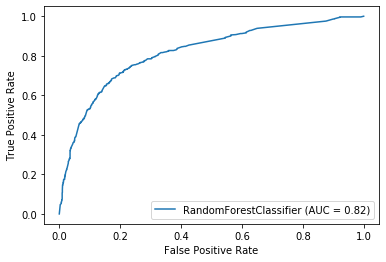

In [261]:
rf_disp = plot_roc_curve(rf, xTest_rf, yTest_rf)
plt.show()

In [79]:
from sklearn.calibration import calibration_curve
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import brier_score_loss
from matplotlib import pyplot


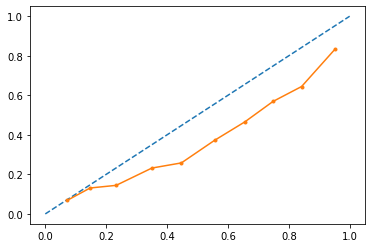

In [80]:
predictions = clf.predict_proba(xTest_rf)[:,1]

# reliability diagram
fop, mpv = calibration_curve(yTest_rf, predictions, n_bins=10, normalize=True)
# plot perfectly calibrated
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot calibrated reliability
pyplot.plot(mpv, fop, marker='.')
pyplot.show()

In [81]:
brier_score_loss(yTest_rf, predictions)

0.1493838651453293

In [82]:
calibrated = CalibratedClassifierCV(clf, method='sigmoid', cv=5)
calibrated.fit(xTrain_rf, (yTrain_rf))

CalibratedClassifierCV(base_estimator=RandomForestClassifier(bootstrap=True,
                                                             ccp_alpha=0.0,
                                                             class_weight=None,
                                                             criterion='gini',
                                                             max_depth=17,
                                                             max_features='auto',
                                                             max_leaf_nodes=None,
                                                             max_samples=None,
                                                             min_impurity_decrease=0.0,
                                                             min_impurity_split=None,
                                                             min_samples_leaf=1,
                                                             min_samples_split=2,
                                 

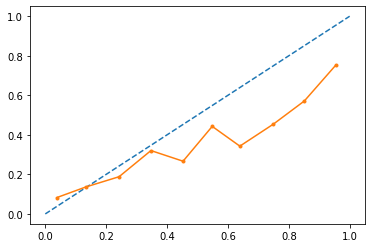

In [83]:
probs = calibrated.predict_proba(xTest_rf)[:, 1]

# reliability diagram
fop, mpv = calibration_curve(yTest_rf, probs, n_bins=10, normalize=True)
# plot perfectly calibrated
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot calibrated reliability
pyplot.plot(mpv, fop, marker='.')
pyplot.show()

In [84]:
brier_score_loss(yTest_rf, probs)

0.15044814519517116

In [85]:
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(yTrue, yPred))

Results on the test set:
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1584
           1       0.60      0.68      0.64       571

    accuracy                           0.79      2155
   macro avg       0.74      0.76      0.75      2155
weighted avg       0.80      0.79      0.80      2155



In [86]:
from sklearn.pipeline import Pipeline 
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
from numpy import ravel


kf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

imba_pipeline = make_pipeline(clf)
scores = cross_validate(imba_pipeline, xTrain_rf, ravel(yTrain_rf), scoring='f1_macro', cv=kf)

In [87]:
print(np.mean(scores['test_score']))
print(scores)

0.8422201405278178
{'fit_time': array([3.21107292, 3.11593604, 3.16622591, 3.26587176, 3.14596891,
       3.14424181, 3.20197392, 3.11008382, 3.13572097, 3.1994009 ]), 'score_time': array([0.13547182, 0.13047123, 0.13204193, 0.12543726, 0.12555909,
       0.12800813, 0.12689114, 0.12620592, 0.13396502, 0.15163922]), 'test_score': array([0.84060266, 0.83753842, 0.84870732, 0.8566879 , 0.84235309,
       0.82802373, 0.82933046, 0.84365204, 0.87078053, 0.82452525])}


In [88]:
y_pred = cross_val_predict(clf, X, ravel(Y), cv = kf)
conf_mat = confusion_matrix(ravel(Y), ravel(y_pred))
print(conf_mat)

[[4309  413]
 [ 775  968]]


In [89]:
params = {
    'n_estimators': [1800,100,200,300,500,1000],
    'random_state': [42]
}

In [90]:
from sklearn.model_selection import GridSearchCV
new_params = {'randomforestclassifier__' + key: params[key] for key in params}
grid_imba = GridSearchCV(imba_pipeline, param_grid=new_params, scoring='neg_brier_score', return_train_score=True)
grid_imba.fit(xTrain_rf, ravel(yTrain_rf));

In [91]:
print(grid_imba.best_params_)
print(grid_imba.best_score_)

{'randomforestclassifier__n_estimators': 1000, 'randomforestclassifier__random_state': 42}
-0.12303445086230609


In [150]:
xTrain_xgb, xTest_xgb, yTrain_xgb, yTest_xgb = train_test_split(X, Y, test_size = 1/3, random_state = 8)

In [151]:
from imblearn.over_sampling import SMOTE
from sklearn import metrics
from imblearn.under_sampling import NearMiss
from collections import Counter

# from imblearn.over_sampling import RandomOverSampler
# ros = RandomOverSampler(random_state=0)
# X_res, Y_res = ros.fit_resample(xTrain_xgb, yTrain_xgb)
# xTrain_xgb = X_res
# yTrain_xgb = Y_res

# #                             ---------------

sm = SMOTE(random_state=42)
X_res, Y_res = sm.fit_resample(xTrain_xgb, yTrain_xgb)


xTrain_xgb = X_res
yTrain_xgb = Y_res

# print(len(xTrain_rf))

# count_0 = 0
# count_1 = 0

# for i in range (len(yTrain_rf)):
#     if (yTrain_xgb[i] == 0):
#         count_0 = count_0 + 1
#     else:
#         count_1 = count_1 + 1
        
# print(count_0, count_1)


# undersample = NearMiss(version=1, n_neighbors=10)
# xTrain_xgb, yTrain_xgb = undersample.fit_resample(xTrain_xgb, yTrain_xgb)
counter = Counter(yTrain_xgb)

print(counter)

Counter({0: 3138, 1: 3138})


/Users/loicalix-brown/opt/anaconda3/lib/python3.7/sklearn/utils/validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/loicalix-brown/opt/anaconda3/lib/python3.7/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [152]:
from xgboost import XGBClassifier

xgb = XGBClassifier(subsample = 0.8, min_child_weight = 1, max_depth = 20, gamma = 0.5, colsample_bytree = 1.0)
kf = StratifiedKFold(n_splits=100, random_state=42, shuffle=True)

xgb.fit(xTrain_xgb,ravel(yTrain_xgb))
yPred_xgb = xgb.predict(xTest_xgb)

In [153]:
cnf_matrix = metrics.confusion_matrix(yTest_xgb, yPred_xgb)
cnf_matrix

array([[1344,  240],
       [ 205,  366]])

In [154]:
yTrue, yPred = yTest_xgb , xgb.predict(xTest_xgb)

from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(yTrue, yPred))

Results on the test set:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1584
           1       0.60      0.64      0.62       571

    accuracy                           0.79      2155
   macro avg       0.74      0.74      0.74      2155
weighted avg       0.80      0.79      0.80      2155



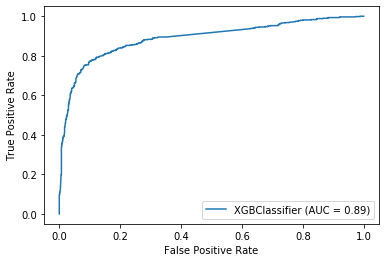

In [470]:
rf_disp = plot_roc_curve(xgb, xTest_xgb, yTest_xgb)
plt.show()

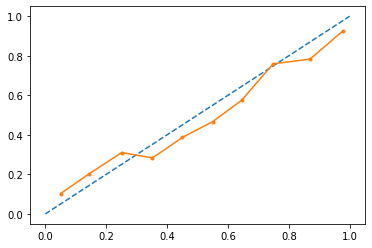

In [473]:
predictions = xgb.predict_proba(xTest_xgb)[:,1]
# reliability diagram
fop, mpv = calibration_curve(yTest_xgb, predictions, n_bins=10, normalize=True)
# plot perfectly calibrated
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot calibrated reliability
pyplot.plot(mpv, fop, marker='.')
pyplot.show()

In [474]:
brier_score_loss(yTest_xgb, predictions)

0.1210245498588016

In [475]:
calibrated = CalibratedClassifierCV(xgb, method='isotonic', cv=5)
calibrated.fit(xTrain_xgb, (yTrain_xgb))

/Users/loicalix-brown/opt/anaconda3/lib/python3.7/sklearn/utils/validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CalibratedClassifierCV(base_estimator=XGBClassifier(base_score=0.5,
                                                    booster='gbtree',
                                                    colsample_bylevel=1,
                                                    colsample_bytree=1.0,
                                                    gamma=0.5,
                                                    learning_rate=0.1,
                                                    max_delta_step=0,
                                                    max_depth=20,
                                                    min_child_weight=1,
                                                    missing=None,
                                                    n_estimators=100, n_jobs=1,
                                                    nthread=None,
                                                    objective='binary:logistic',
                                                    random_state=0, reg_alpha=0,

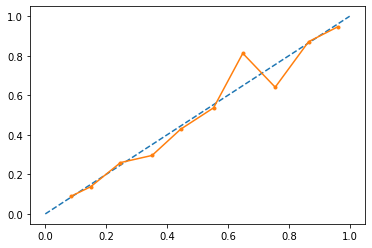

In [482]:
probs = calibrated.predict_proba(xTest_rf)[:, 1]
# reliability diagram
fop, mpv = calibration_curve(yTest_rf, probs, n_bins=10, normalize=True)
# plot perfectly calibrated
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot calibrated reliability
pyplot.plot(mpv, fop, marker='.')
pyplot.show()

In [477]:
brier_score_loss(yTest_rf, probs)

0.1167494298741096

In [483]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,10,15,20]
        }

param_comb = 50
skf = StratifiedKFold(n_splits=10, shuffle = True, random_state = 1001)
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)
model = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='f1_macro', n_jobs=4, cv=skf.split(xTrain_xgb,yTrain_xgb), verbose=3, random_state=1001 )
search = model.fit(xTrain_xgb, yTrain_xgb)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    8.1s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:   50.7s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:  2.4min
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:  3.9min finished
/Users/loicalix-brown/opt/anaconda3/lib/python3.7/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/loicalix-brown/opt/anaconda3/lib/python3.7/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [484]:
print(search.best_params_)

{'subsample': 0.6, 'min_child_weight': 1, 'max_depth': 20, 'gamma': 0.5, 'colsample_bytree': 0.6}


In [485]:
print(search.best_score_)

0.8475273767808034


In [158]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

from sklearn.preprocessing import StandardScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [159]:
import numpy as np 
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

In [337]:
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = 1/3, random_state = 8)

In [345]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_res, Y_res = ros.fit_resample(xTrain_xgb, yTrain_xgb)
xTrain = X_res
yTrain = Y_res

# #                             ---------------

# sm = SMOTE(random_state=42)
# X_res, Y_res = sm.fit_resample(xTrain, yTrain)


# xTrain = X_res
# yTrain = Y_res

# print(len(xTrain))

# count_0 = 0
# count_1 = 0

# for i in range (len(yTrain)):
#     if (yTrain[i] == 0):
#         count_0 = count_0 + 1
#     else:
#         count_1 = count_1 + 1
        
# print(count_0, count_1)


# undersample = NearMiss(version=1, n_neighbors=10)
# xTrain, yTrain = undersample.fit_resample(xTrain, yTrain)
# counter = Counter(yTrain)

# print(counter)

/Users/loicalix-brown/opt/anaconda3/lib/python3.7/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [346]:
scaler = StandardScaler()
xTrain = scaler.fit_transform(xTrain)
xTest = scaler.fit_transform(xTest)

In [347]:
clf = MLPClassifier(solver='lbfgs', alpha=0.5, hidden_layer_sizes=(16,4,2), random_state=1, max_iter = 5000)
clf.fit(xTrain, yTrain)

MLPClassifier(activation='relu', alpha=0.5, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(16, 4, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=5000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [348]:
yPred = clf.predict(xTest)

In [349]:
cnf_matrix = metrics.confusion_matrix(yTest, yPred)
cnf_matrix

array([[ 149, 1435],
       [  23,  548]])

In [350]:
yTrue, yPred = yTest , clf.predict(xTest)

from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(yTrue, yPred))

Results on the test set:
              precision    recall  f1-score   support

           0       0.87      0.09      0.17      1584
           1       0.28      0.96      0.43       571

    accuracy                           0.32      2155
   macro avg       0.57      0.53      0.30      2155
weighted avg       0.71      0.32      0.24      2155



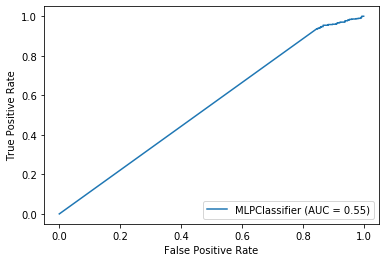

In [351]:
MLP_disp = plot_roc_curve(clf, xTest, yTest)
plt.show()

In [ ]:
predictions = clf.predict_proba(xTest)[:,1]
# reliability diagram
fop, mpv = calibration_curve(yTest, predictions, n_bins=10, normalize=True)
# plot perfectly calibrated
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot calibrated reliability
pyplot.plot(mpv, fop, marker='.')
pyplot.show()

In [ ]:
brier_score_loss(yTest, predictions)

In [ ]:
calibrated = CalibratedClassifierCV(clf, method='sigmoid', cv=kf)
calibrated.fit(xTrain, yTrain)
probs = calibrated.predict_proba(xTest)[:, 1]

In [ ]:
fop, mpv = calibration_curve(yTest, probs, n_bins=10, normalize=True)
# plot perfectly calibrated
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot calibrated reliability
pyplot.plot(mpv, fop, marker='.')
pyplot.show()

In [ ]:
brier_score_loss(yTest, probs)

In [264]:
from sklearn import svm

In [316]:
svm = svm.SVC()

AttributeError: 'SVC' object has no attribute 'SVC'

In [317]:
xTrain_svm, xTest_svm, yTrain_svm, yTest_svm = train_test_split(X, Y, test_size = 1/3, random_state = 8)

In [318]:
sm = SMOTE(random_state=42)
X_res, Y_res = sm.fit_resample(xTrain_svm, yTrain_svm)


# xTrain_svm = X_res
# yTrain_svm = Y_res

# # print(len(xTrain_xgb))

# count_0 = 0
# count_1 = 0

# for i in range (len(yTrain_svm)):
#     if (yTrain_svm[i] == 0):
#         count_0 = count_0 + 1
#     else:
#         count_1 = count_1 + 1
        
# print(count_0, count_1)


# undersample = NearMiss(version=1, n_neighbors=10)
# xTrain_svm, yTrain_svm = undersample.fit_resample(xTrain_svm, yTrain_svm)
# # counter = Counter(yTrain_svm)


# from imblearn.over_sampling import RandomOverSampler
# ros = RandomOverSampler(random_state=0)
# X_res, Y_res = ros.fit_resample(xTrain_svm, yTrain_svm)
# xTrain_svm = X_res
# yTrain_svm = Y_res

/Users/loicalix-brown/opt/anaconda3/lib/python3.7/sklearn/utils/validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/loicalix-brown/opt/anaconda3/lib/python3.7/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [319]:
svm.fit(xTrain_svm, yTrain_svm)

/Users/loicalix-brown/opt/anaconda3/lib/python3.7/sklearn/utils/validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [320]:
yPred_svm = clf.predict(xTest_svm)

In [321]:
print(classification_report(yTest_svm, yPred_svm))

              precision    recall  f1-score   support

           0       0.69      0.36      0.47      1584
           1       0.24      0.56      0.33       571

    accuracy                           0.41      2155
   macro avg       0.47      0.46      0.40      2155
weighted avg       0.57      0.41      0.44      2155



In [301]:
xTrain_lr, xTest_lr, yTrain_lr, yTest_lr = train_test_split(X, Y, test_size = 1/3, random_state = 8)

In [302]:
# sm = SMOTE(random_state=42)
# X_res, Y_res = sm.fit_resample(xTrain_lr, yTrain_lr)


# xTrain_lr = X_res
# yTrain_lr = Y_res

# # print(len(xTrain_xgb))

# count_0 = 0
# count_1 = 0

# for i in range (len(yTrain_lr)):
#     if (yTrain_lr[i] == 0):
#         count_0 = count_0 + 1
#     else:
#         count_1 = count_1 + 1
        
# print(count_0, count_1)


# undersample = NearMiss(version=1, n_neighbors=10)
# xTrain_lr, yTrain_lr = undersample.fit_resample(xTrain_lr, yTrain_lr)
# # counter = Counter(yTrain_lr)


from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_res, Y_res = ros.fit_resample(xTrain_lr, yTrain_lr)
xTrain_lr = X_res
yTrain_lr = Y_res


/Users/loicalix-brown/opt/anaconda3/lib/python3.7/sklearn/utils/validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/loicalix-brown/opt/anaconda3/lib/python3.7/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [303]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(xTrain_lr,yTrain_lr)

/Users/loicalix-brown/opt/anaconda3/lib/python3.7/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [304]:
yPred_lr=logreg.predict(xTest_lr)

In [305]:
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(yTest_lr, yPred_lr))

Results on the test set:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1584
           1       0.62      0.48      0.54       571

    accuracy                           0.78      2155
   macro avg       0.72      0.69      0.70      2155
weighted avg       0.77      0.78      0.77      2155



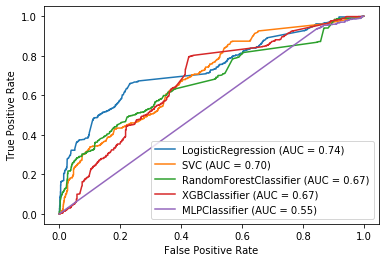

In [289]:
classifiers = [logreg, svm ,rf, xgb,  clf]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, xTest, yTest, ax=ax)

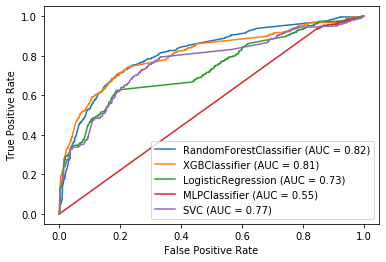

In [352]:
classifiers = [rf, xgb, logreg, svm, clf]
ax = plt.gca()
plot_roc_curve(rf, xTest_rf, yTest_rf, ax=ax)
plot_roc_curve(xgb, xTest_xgb, yTest_xgb, ax=ax)
plot_roc_curve(logreg, xTest_lr, yTest_lr, ax=ax)
plot_roc_curve(clf, xTest, yTest, ax=ax)
plot_roc_curve(svm, xTest_svm, yTest_svm, ax=ax)